In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
import time
import seaborn as sns
plt.style.use('fivethirtyeight')

# Loading Data

In [2]:
filename = 'Full_Data_Mean_Result.csv'
df = pd.read_csv(filename)
print(df.shape)

(19988, 30)


# Data Preparation

In [3]:
df.head()

,Unnamed: 0,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,...,Q pH * W pH,Q Temp * W Temp,Q DO * W DO,Q Salinity * W Salinity,Q Conductivity * W Conductivity,Q Ammonia * W Ammonia,Wn,Q * W,WQI,Result
0,0,1974-10-17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,180.000000,114.287132,...,1.407915,0.335222,-0.140171,0.071176,0.019516,1081.385888,1.0,1083.079546,1083.079546,5
1,1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,216.203608,80.000000,...,1.691090,0.234652,-0.140171,0.071176,0.019516,1081.385888,1.0,1083.262152,1083.262152,5
2,2,1974-10-18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1.0,1083.362721,1083.362721,5
3,3,1974-10-19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1.0,1083.362721,1083.362721,5
4,4,1974-10-20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1.0,1083.362721,1083.362721,5


In [4]:
data = df[['Date', 'pH', 'Temp', 'DO', 'Salinity', 'Conductivity', 'Ammonia', 'WQI']]

In [5]:
data.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,1974-10-17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152
2,1974-10-18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
3,1974-10-19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
4,1974-10-20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721


In [6]:
data['Date'] = pd.to_datetime(data.Date)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,1974-10-17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152
2,1974-10-18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
3,1974-10-19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
4,1974-10-20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721


In [8]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [9]:
data.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI,year,month,day
0,1974-10-17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546,1974,10,17
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152,1974,10,17
2,1974-10-18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,18
3,1974-10-19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,19
4,1974-10-20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,20


In [10]:
data = data.drop('Date', axis = 1)

In [11]:
data.head()

,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI,year,month,day
0,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546,1974,10,17
1,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152,1974,10,17
2,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,18
3,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,19
4,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721,1974,10,20


In [12]:
data = data[['year', 'month', 'day', 'pH', 'Temp', 'DO', 'Salinity', 'Conductivity', 'Ammonia', 'WQI']]

In [13]:
data.head()

,year,month,day,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,1974,10,17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546
1,1974,10,17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152
2,1974,10,18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
3,1974,10,19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
4,1974,10,20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721


# Seperating data features and labels

In [14]:
labels = data['WQI']
data = data.drop('WQI', axis = 1)

In [15]:
data_list = list(data.columns)

In [16]:
data.head()

,year,month,day,pH,Temp,DO,Salinity,Conductivity,Ammonia
0,1974,10,17,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618
1,1974,10,17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618
2,1974,10,18,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618
3,1974,10,19,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618
4,1974,10,20,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618


Converting the data into numpy arrays

In [17]:
import numpy as np
data = np.array(data)
labels = np.array(labels)

# Training and data split

In [18]:
from sklearn.model_selection import train_test_split
data_train, data_test, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 45)

In [19]:
print('Training Data Shape:', data_train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Data Shape:', data_test.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Data Shape: (14991, 9)
Training Labels Shape: (14991,)
Testing Data Shape: (4997, 9)
Testing Labels Shape: (4997,)


In [20]:
print('{:0.1f} years of data in the training set'.format(data_train.shape[0] / 365.))
print('{:0.1f} years of data in the test set'.format(data_test.shape[0] / 365.))

41.1 years of data in the training set
13.7 years of data in the test set


# Random Forest Regression - Base Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=100, random_state = 42, max_features='sqrt')
rfg.fit(data_train, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [22]:
train_pred = rfg.predict(data_train)
test_pred = rfg.predict(data_test)

In [23]:
train_err = abs(train_pred - train_labels)
test_err = abs(test_pred - test_labels)
print('Train set : Mean Absolute Error:', round(np.mean(train_err), 2))
print('Test set : Mean Absolute Error:', round(np.mean(test_err), 2))
train_mse =100 * (train_err / train_labels)
test_mse =100 * (test_err / test_labels)
train_accuracy_rfg = 100 - np.mean(train_mse)
test_accuracy_rfg = 100 - np.mean(test_mse)
print('Train data Accuracy:', round(train_accuracy_rfg, 2), '%.')
print('Test data Accuracy:', round(test_accuracy_rfg, 2), '%.')

Train set : Mean Absolute Error: 1.3
Test set : Mean Absolute Error: 3.58
Train data Accuracy: 99.37 %.
Test data Accuracy: 98.3 %.


In [24]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Evaluating Feature Importance

In [25]:
# Get numerical feature importances
importances = list(rfg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(data, round(importance, 2)) for data, importance in zip(data_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Ammonia              Importance: 0.95
Variable: year                 Importance: 0.02
Variable: day                  Importance: 0.02
Variable: month                Importance: 0.01
Variable: pH                   Importance: 0.0
Variable: Temp                 Importance: 0.0
Variable: DO                   Importance: 0.0
Variable: Salinity             Importance: 0.0
Variable: Conductivity         Importance: 0.0


[None, None, None, None, None, None, None, None, None]

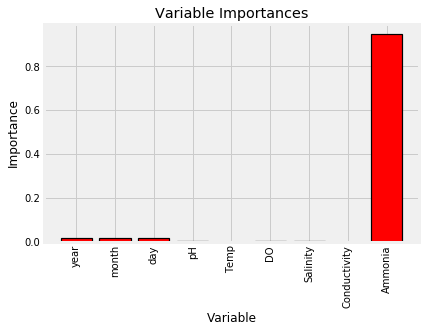

In [26]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

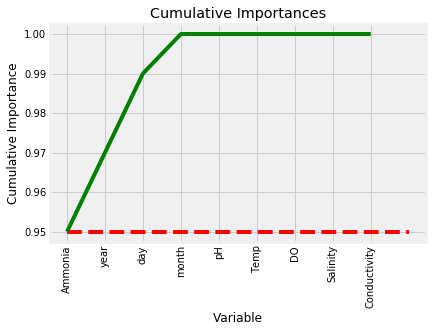

In [27]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

# Cross Validation on Random Search

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
rfg_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, scoring='neg_mean_absolute_error',
                                n_iter = 100, cv = 3, verbose=2, random_state=45, n_jobs = -1, return_train_score=True)
rfg_random.fit(data_train, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [30]:
rfg_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [31]:
rfg_random.cv_results_

{'mean_fit_time': array([ 6.81052438, 28.38019657,  7.08288964,  6.38177522,  1.73892069,
         3.19679546,  6.26574596, 35.6065863 ,  4.35336502, 37.66841165,
        60.8532149 , 14.97092446, 16.1201125 ,  2.42548299, 44.75559537,
         4.27223293,  6.33955328, 27.00727749, 39.017464  ,  2.84542918,
        46.0948596 , 14.38710515, 25.14654136,  7.51680819,  1.8412203 ,
         7.68680731,  6.56832472, 19.87902085, 44.02675772,  8.59431895,
        62.94150432, 28.64320262,  2.87864868,  5.08760873, 21.18846679,
         2.5865953 , 39.54674562,  5.5392549 ,  8.60336208, 13.84394741,
        58.40532136, 16.17744199, 55.14200028,  8.71811493,  7.18260535,
         4.12204591, 12.80994924,  5.83524394, 17.59852823,  9.53863041,
         2.7224133 ,  9.65910904,  3.40117343, 13.14214802,  9.87157059,
         9.5957644 , 29.0447131 ,  9.09002868,  9.92758767, 23.42787743,
        52.49763664,  8.16448935, 54.21511277,  1.46058806, 38.08913143,
        35.04874182, 10.05201356, 

In [32]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mse = 100 * np.mean(errors / y)
    accuracy = 100 - mse
    #print('Model Performance')
    print('Mean Square Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy


In [33]:
print('Base Estimation Evaluation')
base_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
base_model.fit(data_train, train_labels)
print('Model Performance - Train Data')
train_base_accuracy = evaluate(base_model, data_train, train_labels)
print('Model Performance - Test Data')
test_base_accuracy = evaluate(base_model, data_test, test_labels)

Base Estimation Evaluation
Model Performance - Train Data
Mean Square Error: 0.3908.
Accuracy = 99.99%.
Model Performance - Test Data
Mean Square Error: 1.4135.
Accuracy = 99.96%.


In [34]:
print('Random Search Evaluation')
best_random = rfg_random.best_estimator_
print('Model Performance - Train Data')
train_random_accuracy = evaluate(best_random, data_train, train_labels)
print('Model Performance - Test Data')
test_random_accuracy = evaluate(best_random, data_test, test_labels)

Random Search Evaluation
Model Performance - Train Data
Mean Square Error: 0.3880.
Accuracy = 99.99%.
Model Performance - Test Data
Mean Square Error: 1.4875.
Accuracy = 99.96%.


In [37]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -10, ymax = 1)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 1.0, ymax = 65.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

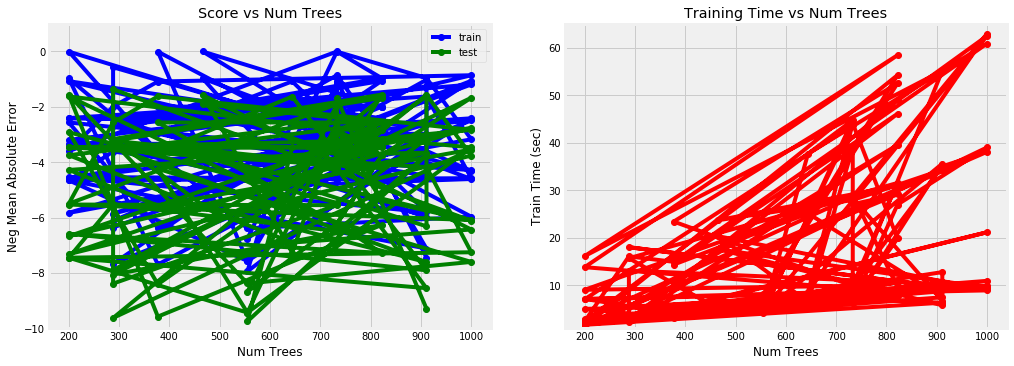

In [38]:
plot_results(rfg_random)

# Cross Validation on GridSearch 

Grid Search CV Round 1

In [39]:
from sklearn.model_selection import GridSearchCV 
param_grid_1 = {'bootstrap': [True], 'max_depth': [15, 30, 45], 'max_features':[2, 5], 'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12], 'n_estimators': [200, 300, 500]}
rf = RandomForestRegressor()
grid_search_1 = GridSearchCV(estimator = rf, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 2)

In [40]:
grid_search_1.fit(data_train, train_labels)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [42]:
print('Grid_Search_CV Evaluation')
best_grid_1 = grid_search_1.best_estimator_
print('Model Performance - Train Data')
train_grid_accuracy = evaluate(best_grid_1, data_train, train_labels)
print('Model Performance - Test Data')
test_grid_accuracy = evaluate(best_grid_1, data_test, test_labels)

Grid_Search_CV Evaluation
Model Performance - Train Data
Mean Square Error: 2.8832.
Accuracy = 98.65%.
Model Performance - Test Data
Mean Square Error: 4.8065.
Accuracy = 97.28%.


Grid Search CV Round 2 

In [43]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'bootstrap': [True], 'max_depth': [10, 20, 30], 'max_features':[3, 4, 6], 'min_samples_leaf': [2, 6],
              'min_samples_split': [7, 11, 18], 'n_estimators': [100, 150, 200]}
rf = RandomForestRegressor(random_state = 45)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [44]:
grid_search.fit(data_train, train_labels)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=45,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [45]:
print('Grid_Search_CV Evaluation')
best_grid = grid_search.best_estimator_
print('Model Performance - Train Data')
train_grid_accuracy = evaluate(best_grid, data_train, train_labels)
print('Model Performance - Test Data')
test_grid_accuracy = evaluate(best_grid, data_test, test_labels)

Grid_Search_CV Evaluation
Model Performance - Train Data
Mean Square Error: 2.1992.
Accuracy = 99.37%.
Model Performance - Test Data
Mean Square Error: 3.7215.
Accuracy = 98.89%.


# Function to evaluate Models

In [46]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [47]:
base_model_results = evaluate_model(rfg, data_train, train_labels, data_test, test_labels)
base_model_results['model'] = 'base_model'
base_model_results

{'time': 0.8420432567596435,
 'error': 3.5828090871448897,
 'accuracy': 98.29990966887301,
 'n_trees': 100,
 'n_features': 9,
 'model': 'base_model'}

In [48]:
random_results = evaluate_model(best_random, data_train, train_labels, data_test, test_labels)
random_results['model'] = 'best_random'
random_results

{'time': 9.832174372673034,
 'error': 1.4875448438584329,
 'accuracy': 99.96102011850883,
 'n_trees': 288,
 'n_features': 9,
 'model': 'best_random'}

In [49]:
grid_search1_results = evaluate_model(best_grid_1, data_train, train_labels, data_test, test_labels)
grid_search1_results['model'] = 'best_grid_1'
grid_search1_results

{'time': 1.733393168449402,
 'error': 4.956495667203961,
 'accuracy': 97.55895643356158,
 'n_trees': 200,
 'n_features': 9,
 'model': 'best_grid_1'}

In [50]:
grid_search2_results = evaluate_model(best_grid, data_train, train_labels, data_test, test_labels)
grid_search2_results['model'] = 'best_grid'
grid_search2_results

{'time': 1.4799801588058472,
 'error': 3.7215215694179866,
 'accuracy': 98.88646301930743,
 'n_trees': 200,
 'n_features': 9,
 'model': 'best_grid'}

In [51]:
comparison = {'model': [base_model_results['model'], random_results['model'], grid_search1_results['model'], 
                        grid_search2_results['model']], 
              'accuracy': [round(base_model_results['accuracy'], 3), round(random_results['accuracy'], 3), 
                           round(grid_search1_results['accuracy'], 3), round(grid_search2_results['accuracy'], 3)],
              'error': [round(base_model_results['error'], 3), round(random_results['error'], 3), 
                        round(grid_search1_results['error'], 3), round(grid_search2_results['error'], 3)],
              'n_features': [base_model_results['n_features'], random_results['n_features'], 
                             grid_search1_results['n_features'], grid_search2_results['n_features']],
              'n_trees': [base_model_results['n_trees'], random_results['n_trees'], grid_search1_results['n_trees'], 
                          grid_search2_results['n_trees']],
              'time': [round(base_model_results['time'], 4), round(random_results['time'], 4), 
                       round(grid_search1_results['time'], 4), round(grid_search2_results['time'], 4)]}

In [52]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [53]:
comparison[['model', 'accuracy', 'error', 'n_features', 'n_trees', 'time']]

,model,accuracy,error,n_features,n_trees,time
0,base_model,98.300,3.583,9,100,0.8420
1,best_random,99.961,1.488,9,288,9.8322
2,best_grid_1,97.559,4.956,9,200,1.7334
3,best_grid,98.886,3.722,9,200,1.4800


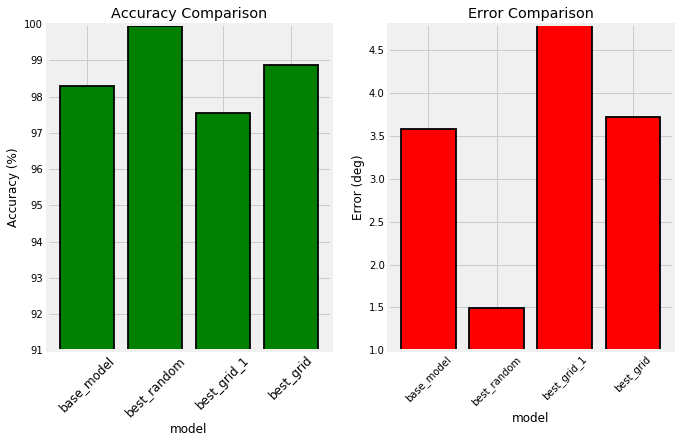

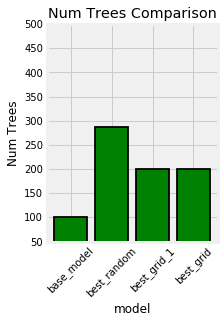

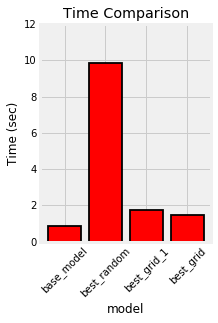

In [54]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 91, ymax = 100)
plt.xlabel('model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['error'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 1, ymax = 4.8)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

plt.subplot(122)
plt.bar(xvalues, comparison['n_trees'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 50, ymax = 500)
plt.xlabel('model'); plt.ylabel('Num Trees'); plt.title('Num Trees Comparison');
plt.show();

plt.subplot(122)
plt.bar(xvalues, comparison['time'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 0, ymax = 12)
plt.xlabel('model'); plt.ylabel('Time (sec)'); plt.title('Time Comparison');
plt.show();

# Training Curves

In [55]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

In [57]:
tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
                                scoring = 'neg_mean_absolute_error')
tree_grid_search.fit(data_train, train_labels);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.9s finished


In [188]:
tree_grid_search.cv_results_

{'mean_fit_time': array([0.01852496, 0.11949197, 0.21289666, 0.37854966, 0.56252488,
        0.64749344, 0.95256837, 1.19281125, 1.39605029, 1.35250155,
        1.48453077, 1.48399393, 1.43808564, 1.262592  , 1.31093558,
        1.54430827, 1.67519331, 1.73436697, 1.76385132, 1.83972875,
        2.00481939, 2.17690333, 2.38632194, 2.45682136, 2.61657961,
        2.5450933 , 2.66156658, 2.79732887, 2.70813799, 2.48574328]),
 'std_fit_time': array([0.00176157, 0.01164435, 0.00559225, 0.06212079, 0.02534353,
        0.0316718 , 0.02346751, 0.04626763, 0.0208399 , 0.04494135,
        0.0233774 , 0.06629299, 0.08017332, 0.03757951, 0.03361618,
        0.03625962, 0.01715316, 0.01304115, 0.00781677, 0.01577169,
        0.0891056 , 0.04065024, 0.04967506, 0.0268666 , 0.02620257,
        0.02526449, 0.03721879, 0.10984139, 0.03986066, 0.14225225]),
 'mean_score_time': array([0.00187365, 0.00507998, 0.00794268, 0.01635059, 0.01450427,
        0.03261948, 0.03992216, 0.04732776, 0.05393966, 0.04

In [191]:
def plot_results_grid(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_score_time']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -8, ymax = 3)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 3.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

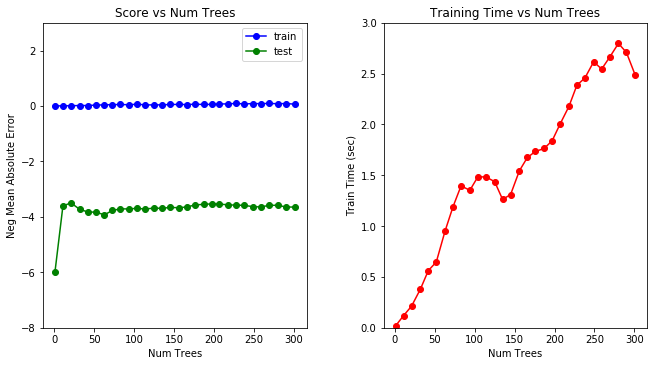

In [192]:
plot_results_grid(tree_grid_search)

In [58]:
NumberOfTrees = ['100', '288', '500', '1000']
TestDataAccuracy = ['98.3', '98.89', '97.28','99.96']
TrainDataAccuracy = ['99.37', '99.37', '98.65', '99.99']
MSE = ['3.58', '3.7215', '5.0286', '1.3216']
Models = ['BaseModel', 'GridsearchCV', 'GridsearchCV2', 'RandomSearch']

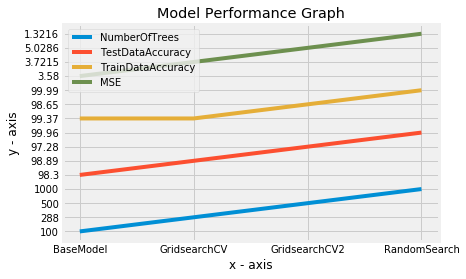

In [59]:
x1 = Models 
y1 = NumberOfTrees
# plotting the line 1 points  
plt.plot(x1, y1, label = "NumberOfTrees") 

x2 = Models  
y2 = TestDataAccuracy
# plotting the line 2 points  
plt.plot(x2, y2, label = "TestDataAccuracy") 

x3 = Models  
y3 = TrainDataAccuracy
# plotting the line 2 points  
plt.plot(x3, y3, label = "TrainDataAccuracy") 

x4 = Models  
y4 = MSE
# plotting the line 2 points  
plt.plot(x4, y4, label = "MSE")

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Model Performance Graph') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

# Calculating the accuracy for new data

Original dataset taken from ca.gov for 60 years 

In [61]:
filename = 'Org_Data_Result.csv'
data_new = pd.read_csv(filename)
print(data_new.shape)

(3391, 8)


In [62]:
data_new.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,10/17/74,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,1094.578569
1,10/17/74,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,1094.807197
2,11/26/74,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,1095.204309
3,11/26/74,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,1094.824796
4,12/2/74,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,1094.792531


In [63]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 8 columns):
Date            3391 non-null object
pH              3391 non-null float64
Temp            3391 non-null float64
DO              3391 non-null float64
Salinity        3391 non-null float64
Conductivity    3391 non-null float64
Ammonia         3391 non-null float64
WQI             3391 non-null float64
dtypes: float64(7), object(1)
memory usage: 212.1+ KB


In [65]:
data_new['Date'] = pd.to_datetime(data_new.Date)

In [66]:
data_new.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,1974-10-17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,1094.578569
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,1094.807197
2,1974-11-26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,1095.204309
3,1974-11-26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,1094.824796
4,1974-12-02,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,1094.792531


In [67]:
data_new['year'] = data_new['Date'].dt.year
data_new['month'] = data_new['Date'].dt.month
data_new['day'] = data_new['Date'].dt.day

In [68]:
data_new = data_new[['year', 'month', 'day', 'pH', 'Temp', 'DO', 'Salinity', 'Conductivity', 'Ammonia', 'WQI']]

In [69]:
data_new.head()

,year,month,day,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,1974,10,17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,1094.578569
1,1974,10,17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,1094.807197
2,1974,11,26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,1095.204309
3,1974,11,26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,1094.824796
4,1974,12,2,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,1094.792531


In [70]:
data_new.describe()

,year,month,day,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000
mean,1995.925686,6.418756,15.931879,8.081018,19.719374,15.832946,14.863006,2129.123370,0.670703,1094.861744
std,15.095930,3.063890,8.608346,0.401923,3.585317,18.019416,4.237349,368.966326,0.639011,1041.290799
min,1974.000000,1.000000,1.000000,0.900000,3.000000,0.120000,0.100000,8.800000,0.000000,1.930811
25%,1978.000000,4.000000,9.000000,8.081018,19.719374,15.832946,14.863006,2129.123370,0.670703,1094.748534
50%,2002.000000,5.000000,15.000000,8.081018,19.719374,15.832946,14.863006,2129.123370,0.670703,1094.882156
75%,2009.000000,10.000000,24.000000,8.081018,19.719374,15.832946,14.863006,2129.123370,0.670703,1095.345100
max,2019.000000,12.000000,31.000000,9.990000,38.400000,733.000000,72.850000,11000.000000,13.100000,21348.784590


In [71]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 10 columns):
year            3391 non-null int64
month           3391 non-null int64
day             3391 non-null int64
pH              3391 non-null float64
Temp            3391 non-null float64
DO              3391 non-null float64
Salinity        3391 non-null float64
Conductivity    3391 non-null float64
Ammonia         3391 non-null float64
WQI             3391 non-null float64
dtypes: float64(7), int64(3)
memory usage: 265.0 KB


In [72]:
labels = data_new['WQI']
data_new = data_new.drop('WQI', axis = 1)

In [73]:
data_new_list = list(data_new.columns)

In [74]:
import numpy as np
data_new = np.array(data_new)
labels = np.array(labels)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, labels, test_size = 0.3, random_state = 0)

In [76]:
print("Train Data :", X_train.shape)

Train Data : (2373, 9)


In [77]:
print("Train Data :", X_test.shape)

Train Data : (1018, 9)


In [78]:
from sklearn.ensemble import RandomForestRegressor
rfg_new = RandomForestRegressor(n_estimators=100, random_state = 0, max_features='sqrt')
rfg_new.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [79]:
X_train_pred = rfg_new.predict(X_train)
X_test_pred = rfg_new.predict(X_test)

In [80]:
X_train_err = abs(X_train_pred - y_train)
X_test_err = abs(X_test_pred - y_test)
print('New Train set : Mean Absolute Error:', round(np.mean(X_train_err), 2))
print('New Test set : Mean Absolute Error:', round(np.mean(X_test_err), 2))
X_train_mse =100 * (X_train_err / y_train)
X_test_mse =100 * (X_test_err / y_test)
X_train_accuracy_rfg = 100 - np.mean(X_train_mse)
X_test_accuracy_rfg = 100 - np.mean(X_test_mse)
print('Train data Accuracy:', round(X_train_accuracy_rfg, 2), '%.')
print('Test data Accuracy:', round(X_test_accuracy_rfg, 2), '%.')

New Train set : Mean Absolute Error: 6.28
New Test set : Mean Absolute Error: 31.73
Train data Accuracy: 96.46 %.
Test data Accuracy: 95.61 %.


In [81]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, 15], 'max_features': [2, 3, 6], 'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [82]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   34.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [83]:
print('New Grid_Search_CV Evaluation')
best_grid_new = grid_search.best_estimator_
print('New Model Performance - Train Data')
X_train_grid_accuracy = evaluate(best_grid_new, X_train, y_train)
print('New Model Performance - Test Data')
X_test_grid_accuracy = evaluate(best_grid, X_test, y_test)

New Grid_Search_CV Evaluation
New Model Performance - Train Data
Mean Square Error: 13.3837.
Accuracy = 95.95%.
New Model Performance - Test Data
Mean Square Error: 37.9650.
Accuracy = 95.43%.


In [84]:
NumberOfTrees = ['100', '200']
TestDataAccuracy = ['95.61', '95.43']
TrainDataAccuracy = ['96.46', '95.95']
MSE = ['31.73', '37.96']
Models = ['BaseModel', 'GridsearchCV']

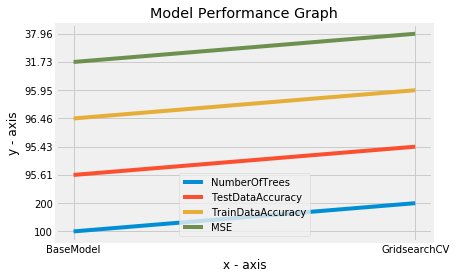

In [85]:
x1 = Models 
y1 = NumberOfTrees
# plotting the line 1 points  
plt.plot(x1, y1, label = "NumberOfTrees") 

x2 = Models  
y2 = TestDataAccuracy
# plotting the line 2 points  
plt.plot(x2, y2, label = "TestDataAccuracy") 

x3 = Models  
y3 = TrainDataAccuracy
# plotting the line 2 points  
plt.plot(x3, y3, label = "TrainDataAccuracy") 

x4 = Models  
y4 = MSE
# plotting the line 2 points  
plt.plot(x4, y4, label = "MSE")

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Model Performance Graph') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 